# Assignment 2

## Part 1

In this part a prediction error method will be used to estimate the parameters of a the data generated in part 1 in exercise 1. 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.optimize import minimize
data = pd.read_csv('/Users/loveredin/Documents/GitHub/advanced_time_series_analysis/assignment_2/data.csv', index_col = 0)
print(data.head())
X_t = np.array(data['Value'])
print(X_t)

      Value
0  0.000000
1  2.496714
2  2.361079
3  3.119904
4  4.147011
[ 0.          2.49671415  2.36107853 ... -5.18094676 -5.2957901
 -4.15212948]


In [111]:
def kernel(x, kernel_function = 'gaussian'):

    # Define different cases of kernel functions
    if kernel_function == 'gaussian':
        return np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi)
    elif kernel_function == 'tricube':
        in_interval = np.abs(x) <= 1
        weights = np.zeros_like(x, dtype = float)
        weights[in_interval] = (1 - np.abs(x[in_interval]) ** 3) ** 3
        return weights
    else:
        return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)


In [112]:
# Algo:
# Define the loss function
# Taylor expansion of loss function, done analytically
# Evaluate the taylor expansion of order 2, in the point theta_0
# Calculate gradient and hessian, evaluated at theta_0 and theta_est
# Use the scipy function minimization, when defined the loss function, to estimate the new parameters
# Estimate new parameters based on old, equation

# Only make small adjustments, 

# The data we are working with and am trying to estimate the parameters for is a setar model, with four parameters, theta_00, theta_01, theta_10, theta, 
# Want to compute the value for all N time values of the time series


def conditional_expectation(X_t_lagged, theta, threshold = 0):
    return np.where(X_t_lagged < threshold, theta[0] + theta[1] * X_t_lagged, 2 + 0.2 * X_t_lagged[-1])
    
def loss_function(X_t, theta, conditional_expectation):
    # This function defines the lag for which, time series to use, in this case it is going to be the lagged 1 time series
    
    # Optimization is carried out for all N, the length of the entire time series
    # If the optimizartion were to be carried out for a sub-sequent of the time series, the partial time series X_t of length N, would have been investigated
    # Here N = len(X_t) - 1

    return sum((X_t[1 : ] - conditional_expectation(X_t[ : -1], theta)) ** 2)   

# Only estimate two parameters
theta_0 = np.zeros(2)

theta_hat = minimize(lambda theta: loss_function(X_t, theta, conditional_expectation), theta_0)

print(theta_hat)

print(f'The parameter estimation is {theta_hat.x}')

# optimized theta: [-2.06836669  0.48354977]
# Actual theta [-2, 0.5], fairly good estimation, only estimated two of the parameters, with the other ones fixed to make 2 feasible

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 11766.435106909581
        x: [-2.068e+00  4.835e-01]
      nit: 5
      jac: [ 1.709e-03 -4.150e-03]
 hess_inv: [[ 6.985e-04  1.645e-04]
            [ 1.645e-04  4.180e-05]]
     nfev: 123
     njev: 38
The parameter estimation is [-2.06836669  0.48354977]


## Part 2

Plotting contour curves for different values of N, for the loss

(1000, 1000)
[[132046.73229022 132114.38549972 132182.05862101 ... 209383.31216319
  209470.81744097 209558.34263055]
 [131755.73303294 131823.30818941 131890.90325769 ... 209014.49404168
  209101.92126644 209189.368403  ]
 [131465.06574932 131532.56285277 131600.07986802 ... 208646.00789383
  208733.35706556 208820.7261491 ]
 ...
 [  6747.38441806   6737.21876333   6727.0730204  ...   6498.55665611
    6508.24306967   6517.94939502]
 [  6787.36289498   6777.11918723   6766.89539128 ...   6460.71626881
    6470.32462934   6479.95290168]
 [  6827.67334557   6817.35158479   6807.04973581 ...   6423.20785517
    6432.73816268   6442.28838199]]


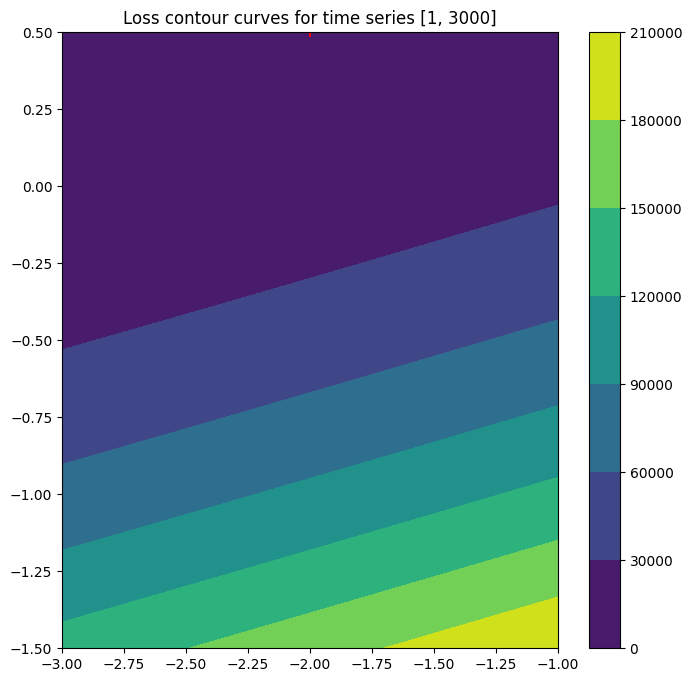

(1000, 1000)
[[2355.85766377 2356.83447311 2357.81157103 ... 3473.01672146
  3474.28124193 3475.54605098]
 [2351.87995913 2352.85564673 2353.8316229  ... 3467.92063705
  3469.18403578 3470.44772308]
 [2347.90686726 2348.88143312 2349.85628754 ... 3462.82916541
  3464.0914424  3465.35400796]
 ...
 [ 680.35610062  680.21453019  680.07324834 ...  682.49052892
   682.63666963  682.78309891]
 [ 680.97733165  680.83463947  680.69223588 ...  681.99338018
   682.13839914  682.28370668]
 [ 681.60317545  681.45936153  681.31583619 ...  681.50084422
   681.64474143  681.78892723]]


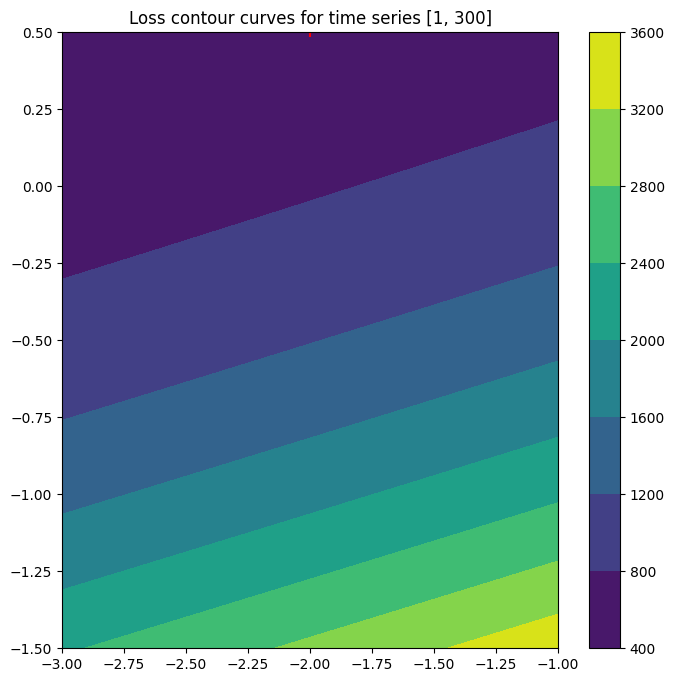

(1000, 1000)
[[27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 ...
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]]


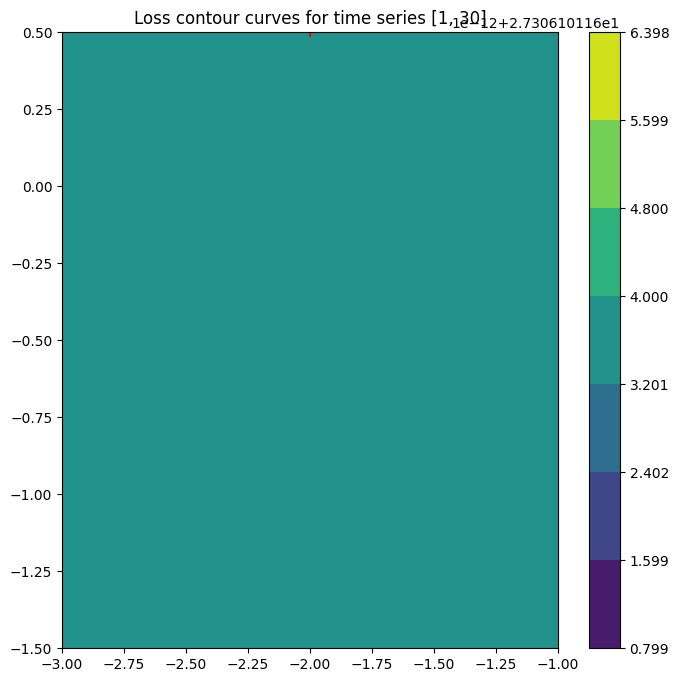

(1000, 1000)
[[14358.16897974 14365.90945539 14373.65231981 ... 23261.46439872
  23271.5864832  23281.71095646]
 [14325.7441626  14333.47557831 14341.20938279 ... 23220.00682402
  23230.11984856 23240.23526188]
 [14293.35686492 14301.07922069 14308.80396524 ... 23178.58676877
  23188.69073338 23198.79708676]
 ...
 [  659.26279295   657.97051103   656.68061789 ...   556.89892047
    557.98824739   559.07996308]
 [  664.24487641   662.94353456   661.64458148 ...   552.84824637
    553.92851335   555.01116911]
 [  669.26447934   667.95407755   666.64606453 ...   548.83509173
    549.90629878   550.97989459]]


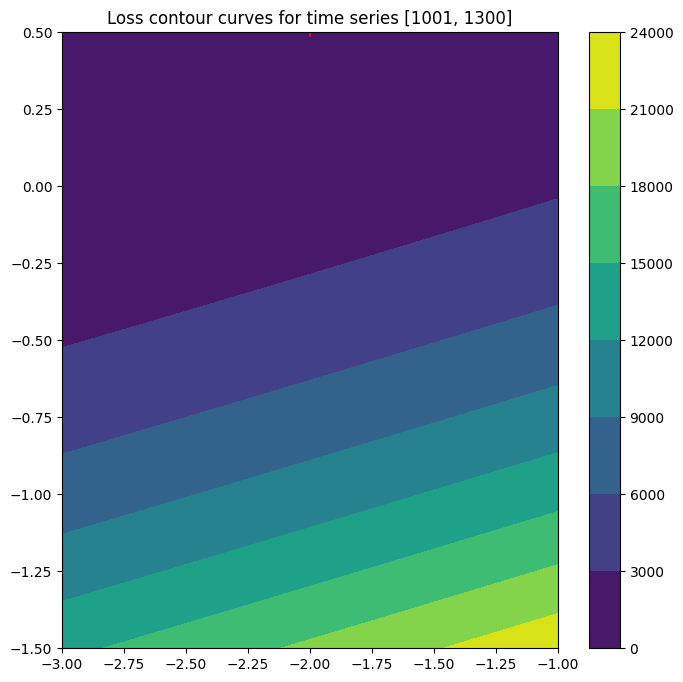

(1000, 1000)
[[ 715.49822281  716.02461273  716.55122709 ... 1351.74908122
  1352.49924647 1353.24963616]
 [ 713.71607617  714.24177784  714.76770396 ... 1349.28075352
  1350.03023052 1350.77993196]
 [ 711.93621889  712.46123231  712.98647018 ... 1346.81471517
  1347.56350392 1348.31251712]
 ...
 [  75.37801695   75.2182258    75.0586591  ...   27.50635732
    27.57034151   27.63455013]
 [  75.87836026   75.71788087   75.55762592 ...   27.32051957
    27.38381551   27.44733589]
 [  76.38099293   76.21982529   76.0588821  ...   27.13697118
    27.19957887   27.26241101]]


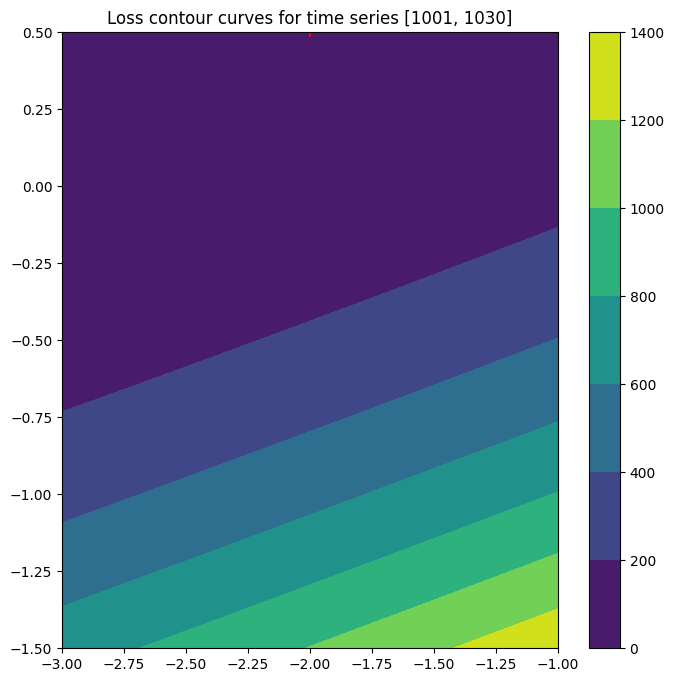

In [113]:
theta_3, theta_4 = 2, 0.2
# Actual theta_1, theta_2 = [-2, 0.5]
theta_asterisk = [[theta_hat.x[0],  theta_hat.x[1]],  [theta_3, theta_4]]

def model(X_t_1, theta_asterisk):
    if X_t_1 < 0:
        return theta_asterisk[0][0] + theta_asterisk[0][1] * X_t_1
    else: 
        return theta_asterisk[1][0] + theta_asterisk[1][1] * X_t_1
    

# In this part, it is desired to create a 3d contour plot of the N, and the lag??
# The following contour curves function will be used
# plt.contour([X, Y, ], Z)

def plot_contour(X_t_subset, p1_range, p2_range, loss_function, range_idx ,estimation_function = conditional_expectation):
    # In this, we want in an interval to plot the contours as a function of p1 and p2, for different lengths of the time series
    # We expect to see a lot of lines, decreases around the actual parameters, plot an 'x' around actual parameters
    
    # Determine the loss matrix
    # local_loss_matrix = np.array([[loss_function(X_t_subset, [p1, p2], estimation_function) for p2 in p2_range] for p1 in p1_range])
    local_loss_matrix = np.array([[loss_function(X_t_subset, [p1, p2], estimation_function) for p1 in p1_range] for p2 in p2_range])
    print(local_loss_matrix.shape)
    print(local_loss_matrix)
    plt.figure(figsize = (8, 8))
    P1_RANGE, P2_RANGE = np.meshgrid(p1_range, p2_range)
    # plt.contour([p1_range, p2_range], local_loss_matrix)
    # plt.contour([P1_RANGE, P2_RANGE], local_loss_matrix)
    plt.contourf(P1_RANGE, P2_RANGE, local_loss_matrix)
    plt.colorbar()
    plt.scatter([-2], [0.5], marker = '+', color = 'red', s = 50)
    plt.title(f'Loss contour curves for time series [{range_idx[0]}, {range_idx[1]}]')
    plt.show()

# Defining parameters
def main():
    nr_points = 1000
    p1_range, p2_range = np.linspace(-3, -1, nr_points), np.linspace(- 3 / 2, 1 / 2, nr_points)
    
    starts, stops = [1, 1, 1, 1001, 1001], [3000, 300, 30, 1300, 1030]
    for interval_index, _ in enumerate(starts):
        plot_contour(X_t[starts[interval_index] : stops[interval_index]], p1_range, p2_range, loss_function, [starts[interval_index], stops[interval_index]])

main()



## Part 3

In this part, a doubly stochastic model will be simulated. The following AR(1)-AR(1) will be simulated.

0.31357859928172954 -0.06119269443141251
0.2369434735986691 -0.10630029142719742
0.41412227016397607 -0.4629847317996781
0.45407121336876444 -0.34143938442486854
0.38454838345919873 -0.239829379280371
0.4167874038251385 0.02221946843175142
0.4140046665501926 -0.14755173519051476
0.4671414663040766 0.6171650818971387
0.5127830924461988 0.256008813663389
0.4268893918270338 -0.18421102777725473
0.42542320521005095 0.10352217448023333
0.5785264338922436 0.1393618718559801
0.4741518518668769 0.19984049652119124
0.5238468427138875 0.17733518876091514
0.41316290383069076 0.4044062114932728
0.46255599981418116 0.2971604095983702
0.434539988426139 0.15244481971776527
0.431970174545327 0.04609843278831499
0.5794587988562289 0.37274949053610945
0.40769016179343875 0.43228443558163343
0.3471202884422261 0.5991965258257701
0.37715721708196864 0.33781727720007965
0.45789555154016415 -0.1239798588620794
0.4472102841955448 -0.08724030069679385
0.5041883783685911 0.05125137415435684
0.4896447279321293 

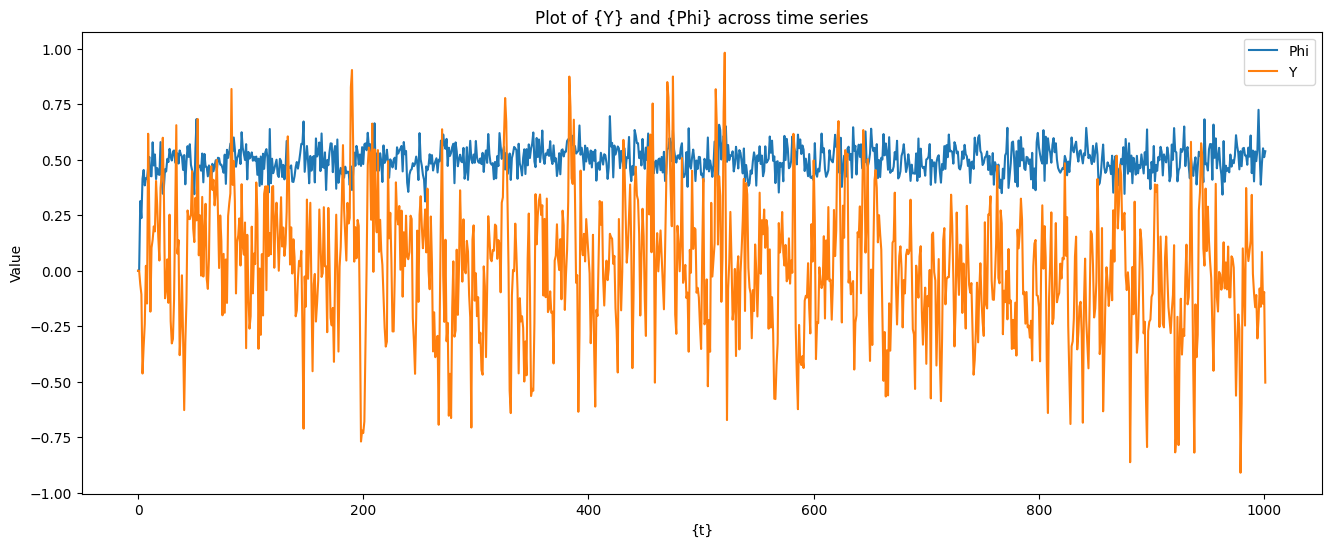

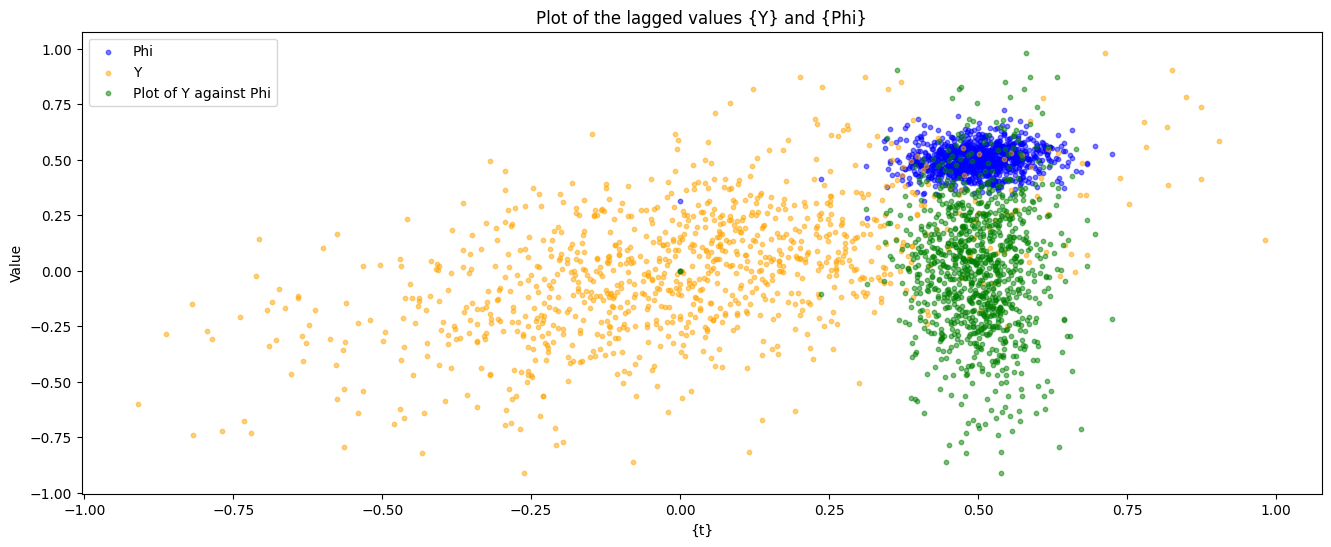

In [114]:
def doubly_stochastic(phi, mu, sigma_epsilon, sigma_zeta, nr_points = 1000): # , p1 = 1, p2 = 1): # Make adjustable with degree of AR model
    Phi, Y = [0], [0] # Initial values of the process
    for data in range(nr_points):
        epsilon_t = np.random.normal(0, sigma_epsilon ** 2)
        zeta_t = np.random.normal(0, sigma_zeta ** 2)
        Phi_t = mu + phi * (Phi[-1] - mu) + zeta_t
        Y_t = Phi_t * Y[-1] + epsilon_t
        Phi.append(Phi_t)
        Y.append(Y_t)

    return Phi, Y

def doubly_stochastic_AR_1_AR_2(phi_1, phi_2, mu, sigma_epsilon, sigma_zeta, nr_points = 1000): # , p1 = 1, p2 = 1): # Make adjustable with degree of AR model
    Phi, Y = [0, 0], [0, 0] # Initial values of the process
    for data in range(nr_points):
        # State space form (AR(1)-AR(2))
        epsilon_t = np.random.normal(0, sigma_epsilon ** 2)
        zeta_t = np.random.normal(0, sigma_zeta ** 2)
        delta = mu * (1 - phi_1 - phi_2) # Not updated, only parameters for the model
        A = np.array([[phi_1, phi_2, 1], [1, 0, 0], [0, 0, 1]])
        x = np.transpose(np.array([Phi[-1], Phi[-2], delta]))
        b = np.transpose(np.array([1, 0, 0]))
        

        # Calculate updated values
        Phi_asterisk = np.matmul(A, x) + b * zeta_t
        Phi_t = Phi_asterisk[0]
        Y_t = np.matmul(np.array([Y[-1], 0, 0]), Phi_asterisk) + epsilon_t
        print(Phi_t, Y_t)

        Phi.append(Phi_t)
        Y.append(Y_t)

    return Phi, Y


def plot_doubly_stochastic(phi = 1 / 8, 
                        mu = 1 / 4, 
                        sigma_epsilon = 1 / 2, 
                        sigma_zeta = 1 / 2, 
                        nr_points = 1000):
    
    # Phi, Y = doubly_stochastic(phi, mu, sigma_epsilon, sigma_zeta, nr_points)
    Phi, Y = doubly_stochastic_AR_1_AR_2(phi_1 = 1 / 8, phi_2 = 1 / 4, mu = 1 / 2, sigma_epsilon = 1 / 2, sigma_zeta = 1 / 4, nr_points = nr_points)
    plt.figure(figsize = (16, 6))
    plt.plot(np.arange(len(Phi)), Phi, label = 'Phi')
    plt.plot(np.arange(len(Y)), Y, label = 'Y')
    plt.legend()
    plt.title(rf'Plot of {{Y}} and {{Phi}} across time series')
    plt.xlabel(rf'{{t}}')
    plt.ylabel('Value')
    plt.show()

    # Plot the increments
    plt.figure(figsize = (16, 6))
    plt.scatter(Phi[ : -1], Phi[1 : ], label = 'Phi', color = 'blue', s = 10, alpha = 1 / 2)
    plt.scatter(Y[ : -1], Y[1 : ], label = 'Y', color = 'orange', s = 10, alpha = 1 / 2)
    plt.scatter(Phi, Y, label = 'Plot of Y against Phi', color = 'green', s = 10, alpha = 1 / 2)
    plt.legend()
    plt.title(rf'Plot of the lagged values {{Y}} and {{Phi}}')
    plt.xlabel(rf'{{t}}')
    plt.ylabel('Value')
    plt.show()


plot_doubly_stochastic()

## Part 4

In this part, the Extended Kalman Filter will be mnodelled.

### Part 4a

In this part the model defined below will be simulated. The model will be investigated further in the following part. However, first the data is required, which will be simulated with the parameter $a = 0.4$.

Model:

$$
x_{t + 1} = a x_{t} + v_t, \quad v_t \quad \text{normally distributed white noise with mean}, \mu_v = 0, \text{and variance}, \sigma_v^2 = 1
$$

$$
y_{t} = x_t + e_t, \quad e_t \quad \text{normally distributed white noise with mean}, \mu_e = 0, \text{and variance}, \sigma_e^2 = 1
$$

        X_t       Y_t
0  0.000000  0.698041
1 -0.560438  0.980112
2  1.676142  2.058931
3  2.251335  3.454395
4  1.760875  2.592803


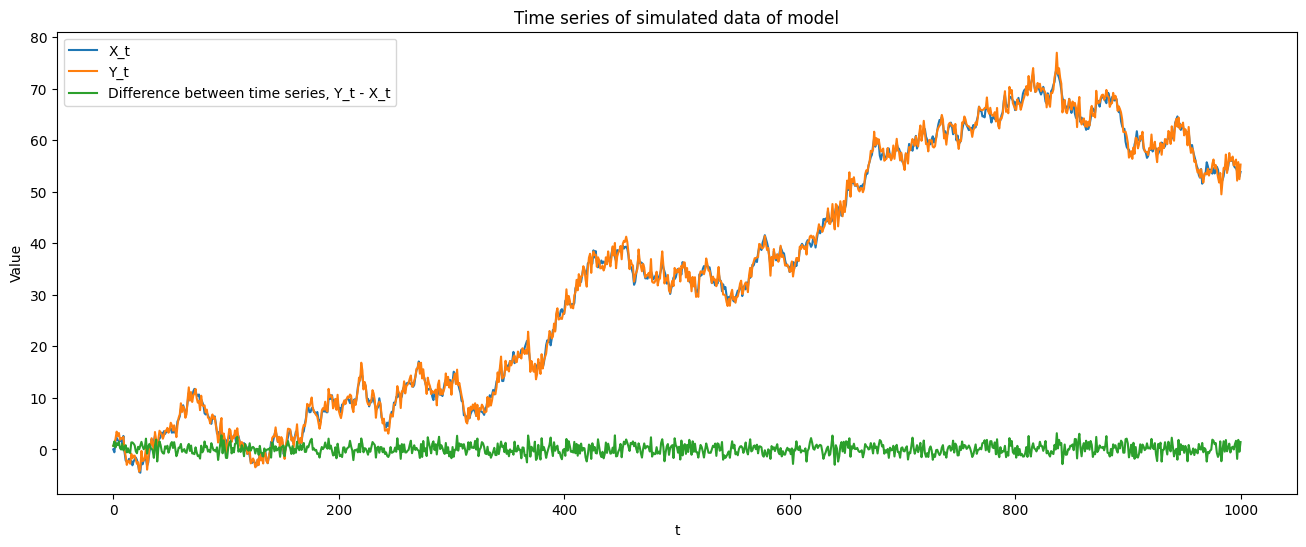

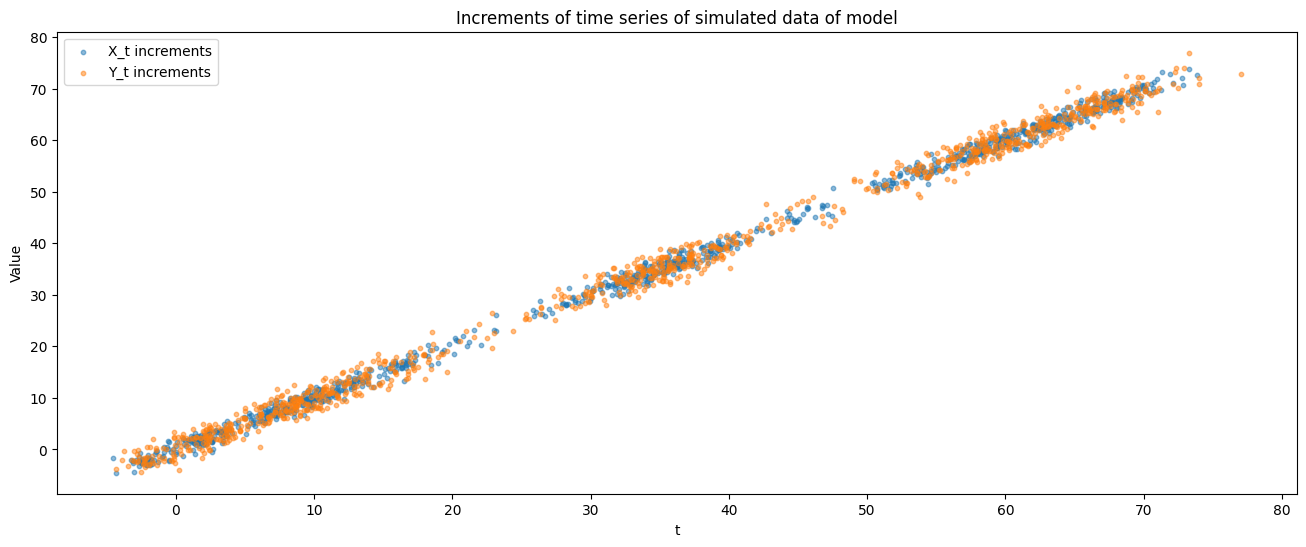

In [115]:
def model(a, sigma_v, sigma_e, nr_simulations):
    
    X, Y = [0], []
    state_vector = np.transpose(np.array([0, 0]))
    for state in range(nr_simulations):
        v_t, e_t = np.random.normal(0, sigma_v ** 2), np.random.normal(0, sigma_e ** 2) # Generate random errors
        state_vector = np.matmul(np.array([[1, 0], [1, 0]]), state_vector) + np.transpose(np.array([v_t, e_t]))
        X.append(np.transpose(state_vector)[0])
        Y.append(np.transpose(state_vector)[1])

    # Final value
    Y.append(X[-1] + np.random.normal(0, sigma_e))
    return X, Y

def plot_model(a, sigma_v, sigma_e, nr_simulations):
    X_t, Y_t = model(a = a, sigma_v = sigma_v, sigma_e = sigma_e, nr_simulations = nr_simulations)
    simulated_data = pd.DataFrame(np.transpose(np.array([X_t, Y_t])), columns = ['X_t', 'Y_t'])
    print(simulated_data.head())

    # Plot the time series
    plt.figure(figsize = (16, 6))
    plt.plot(simulated_data.index, simulated_data['X_t'], label = 'X_t')
    plt.plot(simulated_data.index, simulated_data['Y_t'], label = 'Y_t')
    plt.plot(simulated_data.index, (simulated_data['Y_t'] - simulated_data['X_t']), label = 'Difference between time series, Y_t - X_t')
    plt.title('Time series of simulated data of model')
    plt.xlabel('t')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Plot of increments
    plt.figure(figsize = (16, 6))
    plt.scatter(simulated_data['X_t'].values[ : -1], simulated_data['X_t'].values[1 : ], label = 'X_t increments', s = 10, alpha = 0.5)
    plt.scatter(simulated_data['Y_t'].values[ : -1], simulated_data['Y_t'].values[1 : ], label = 'Y_t increments', s = 10, alpha = 0.5)
    plt.title('Increments of time series of simulated data of model')
    plt.xlabel('t')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    return simulated_data

# Execution of model
a, sigma_v, sigma_e, nr_simulations = 0.4, 1, 1, 1000
simulated_data = plot_model(a = a, sigma_v = sigma_v, sigma_e = sigma_e, nr_simulations = nr_simulations)

### Part 4b
In this part the parameter $a$ of the model above will be estimated using an extended Kalman filter (EKF).

In [136]:
# We will start by defining the parameters for the Kalman filter optimization

a_0 = 0.5
sigma_a_0 = 1 # The squared sigma value will be sigma_a_0 ** 2 = 1
sigma_v = 1 # Convergence for both 1 and 10 will be evaluated and plotted
sigma_e = 1

# We will define the variance matrices
R_v = np.array([[sigma_v, 0], [0, 0]])
R_e = sigma_e
R_a = sigma_a_0

# The data is stored in simulated_data
Z_t = np.transpose(np.array([0, a_0])) # Initial state estimation
P_t = np.array([[R_e, 0], [0, R_a]]) # Variance of states before updated in algorithm, no covariance
H_t = np.array([1, 0])
Z = []
I = np.transpose([1, 1])
sigma_a = []


for data_idx, data in enumerate(simulated_data):
    y = simulated_data['Y_t'].values
    f_t = np.matmul(np.array([[Z_t[1], 0], [0, 1]]), Z_t) # Update of state estimation , differentiate the transition function
    F_t = np.array([[Z_t[1], Z_t[0]], [0, 1]]) # Define the differentiated 

    # # Define the Kalman gain
    # print(F_t.shape, P_t.shape, H_t.shape)
    # a = np.matmul(F_t, np.matmul(P_t, np.transpose(H_t)))
    # b1 = F_t
    # b21 = np.matmul(P_t, np.transpose(H_t))
    # b22 = R_e * I
    # b2 = (b21 + b22)
    # b2 = np.array([[b2[0]], [b2[1]]])
    # print(b1.shape)

    # b = np.linalg.inv(np.matmul(b1, b2))
    # K_t = np.matmul(a, b)

    b = (np.matmul(H_t, np.matmul(P_t, np.transpose(H_t))) + R_e)
    a = np.matmul(F_t, np.matmul(P_t, np.transpose(H_t)))
    K_t = a / b

    # Calculate the new state space estimate
    Z_t = f_t + K_t * (y[data_idx] - Z_t[0]) # Kalman gain multiplied with difference of old and new value

    # Update covariance estimate
    P_t = np.matmul(F_t, np.matmul(P_t, np.transpose(H_t))) + R_v - np.matmul(np.matmul(K_t, (R_e + np.matmul(H_t, np.matmul(P_t, np.transpose(H_t))))), np.transpose(K_t))

    # Store the values
    Z.append(np.transpose(Z_t))
    sigma_a.append(P_t[1][1])

Z = np.array(Z)
sigma_a = np.array(sigma_a)

plt.figure(figsize=(16, 6))
plt.plot(np.arange(Z.shape[0]), Z[:, 0], label = 'X_t')
plt.plot(np.arange(Z.shape[0]), Z[:, 1], label = 'Y_t')
plt.plot(np.arange(Z.shape[0]), (simulated_data['X_t'].values - Z[:, 0]), label = 'Difference between estimate and actual data for X_t')
plt.plot(np.arange(Z.shape[0]), (simulated_data['Y_t'].values - Z[:, 1]), label = 'Difference between estimate and actual data for Y_t')
plt.legend()
plt.xlabel('t')
plt.ylabel('Value')
plt.title('EKF estimate of time series and the difference between estimate and data')
plt.show()

# Plot of parameter update during estimation
plt.figure(figsize=(16, 6))
plt.plot(np.arange(len(sigma_a)), sigma_a, label = 'Estimate of a parameter, updating over time')
plt.legend()
plt.xlabel('t')
plt.ylabel('Value')
plt.title('EKF estimate of parameter a')
plt.show()



ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)